In [4]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from tensorflow.examples.tutorials.mnist import input_data

In [6]:
# Extracting the mnist datasets
mnist = input_data.read_data_sets('tf_class/MNIST_data/', one_hot=True)

Extracting tf_class/MNIST_data/train-images-idx3-ubyte.gz
Extracting tf_class/MNIST_data/train-labels-idx1-ubyte.gz
Extracting tf_class/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting tf_class/MNIST_data/t10k-labels-idx1-ubyte.gz


In [7]:
# single image, just reshaped in [28, 28] matrix, actually it is in [784, 1] shape
mnist.train.images[29].reshape([28,28])

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

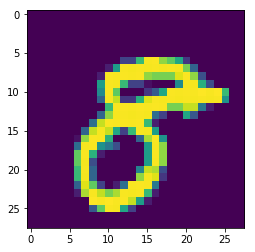

In [8]:
# a sample image displayed with imshow of pyplot
_=plt.imshow(mnist.train.images[29].reshape([28,28]))

In [9]:
# defined number od classes/labels(10 in our case), number of features i.e. number of columns(784 here)
num_classes = mnist.train.labels.shape[1]
num_features = mnist.train.images.shape[1]
num_output = mnist.train.labels.shape[1]

x_train = mnist.train.images     # train data
y_train = mnist.train.labels     # train labels
x_test = mnist.test.images       # test data
y_test = mnist.test.labels       # test labels

num_layers_0 = 512      # number of neurons in hidden layer one.
num_layers_1 = 256      # number of neurons in hidden layer one.

In [10]:
# Place holders for X and Y
input_x = tf.placeholder(tf.float32, shape=(None, num_features))
input_y = tf.placeholder(tf.float32, shape=(None, num_classes))

# this one is for droput layer
keep_prob = tf.placeholder(tf.float32)

In [11]:
# Define weight W and bias b for input, hidden and output layer
# weights_0 for input layer shape = [feature, layer_0]   =   [784, 512]
weights_0 = tf.Variable(tf.truncated_normal(shape=[num_features, num_layers_0], mean=0.0, stddev=tf.sqrt(2.0/num_features)))

bias_0 = tf.Variable(tf.random_normal(shape=[num_layers_0]))

# weights_1 for hidden layer1 shape = [layer_0, layer_1]   =   [512, 256]
weights_1 = tf.Variable(tf.truncated_normal(shape=[num_layers_0, num_layers_1], mean=0.0, stddev=tf.sqrt(2.0/num_layers_0)))
bias_1 = tf.Variable(tf.random_normal(shape=[num_layers_1]))

# weights_2 for hidden layer2 shape = [layer_1, class/out]   =   [256, 10]
weights_2 = tf.Variable(tf.truncated_normal(shape=[num_layers_1, num_output], mean=0.0, stddev=tf.sqrt(2.0/num_layers_1)))
bias_2 = tf.Variable(tf.random_normal(shape=[num_output]))

In [12]:
# Tensorflow's logit is defined as the output of a neuron without applying activation function: logit = w*x + b
# for input and hidden layner1 we will use RELU as activation function.
# for hidden layer2 i.e. last layer we will use sofmax as activation function and finally cross_entropy as loss/cost function.

regularizer_rate = 0.0001

# Input layer
logit_0 = tf.matmul(input_x, weights_0) + bias_0
input_layer_out = tf.nn.relu(features=logit_0)
input_layer_dropout = tf.nn.dropout(x = input_layer_out, keep_prob=keep_prob)

# hidden layer 1
logit_1 = tf.matmul(input_layer_dropout, weights_1) + bias_1
hidden_layer_1_out = tf.nn.relu(features=logit_1)
hidden_layer_1_dropout = tf.nn.dropout(x=hidden_layer_1_out, keep_prob=keep_prob)

# hidden layer 2
logit_2 = tf.matmul(hidden_layer_1_dropout, weights_2) + bias_2

# loss/cost function for output layer : softmax
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logit_2, labels=input_y))

# L2 regulaaization
regularizers  = tf.nn.l2_loss(weights_0) + tf.nn.l2_loss(weights_1) + tf.nn.l2_loss(weights_2)
loss = tf.reduce_mean(loss + regularizer_rate* regularizers)

# above L2 can also be used like below, both will give the same result.

#loss = (tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logit_2, labels=input_y) +
#           regularizer_rate*(tf.nn.l2_loss(weights_0) + tf.nn.l2_loss(weights_1) + tf.nn.l2_loss(weights_2))))


# y_pred is defined to predict the new image but logit_2 can directly be used, both will give the same result.
y_pred = tf.nn.softmax(logits=logit_2)

In [13]:
# We will use Decaying learning rate
starter_learning_rate = 0.001

global_step = 0
learning_rate = tf.train.exponential_decay(learning_rate=starter_learning_rate, global_step=global_step,   
                                           decay_steps=5, decay_rate=0.85, staircase=True)

# Optimizer : used AdamOptimizer, but GradientDescentOptimizer can also be used.
optimizer = (tf.train.AdamOptimizer(learning_rate=learning_rate).   
                minimize(loss=loss, var_list=[weights_0, weights_1, weights_2, bias_0, bias_1, bias_2]))
#optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [14]:
# Metrics definition to check the accuracy
correct_prediction = tf.equal(tf.argmax(input_y,1), tf.argmax(y_pred,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [15]:
## Training parameters
from sklearn.metrics import roc_auc_score, accuracy_score

batch_size = 128
epochs=18
dropout_prob = 0.6
training_accuracy = []
training_loss = []
testing_accuracy = []

# define interactive tensorflow session
sess = tf.Session()

# initialize all the variables.
init = tf.global_variables_initializer()
sess.run(init)

for epoch in range(epochs):
    
    arr = np.arange(x_train.shape[0])
    np.random.shuffle(arr)
    for index in range(0, x_train.shape[0], batch_size):
        sess.run(optimizer, feed_dict={input_x: x_train[arr[index:index+batch_size]],input_y: y_train[arr[index:index+batch_size]], keep_prob:dropout_prob})
                          
                        
    training_accuracy.append(sess.run(accuracy, feed_dict= {input_x : x_train, input_y: y_train, keep_prob:1}))
                                                         
    training_loss.append(sess.run(loss, feed_dict= {input_x : x_train, input_y: y_train, keep_prob:1}))
                                      
    
    testing_accuracy.append(sess.run(accuracy, feed_dict= {input_x : x_test, input_y: y_test, keep_prob:1}))
    #testing_accuracy.append(accuracy_score(y_test.argmax(1), sess.run(logit_2, {input_x: x_test,keep_prob:1}).argmax(1)))
                            
    print("Epoch:{0}, Train loss: {1:.2f} Train acc: {2:.3f}, Test acc:{3:.3f}".format(epoch,
                                                                    training_loss[epoch],
                                                                    training_accuracy[epoch],
                                                                    testing_accuracy[epoch]))

Epoch:0, Train loss: 0.19 Train acc: 0.954, Test acc:0.953
Epoch:1, Train loss: 0.14 Train acc: 0.970, Test acc:0.968
Epoch:2, Train loss: 0.12 Train acc: 0.978, Test acc:0.972
Epoch:3, Train loss: 0.10 Train acc: 0.983, Test acc:0.975
Epoch:4, Train loss: 0.10 Train acc: 0.985, Test acc:0.976
Epoch:5, Train loss: 0.09 Train acc: 0.987, Test acc:0.978
Epoch:6, Train loss: 0.09 Train acc: 0.990, Test acc:0.979
Epoch:7, Train loss: 0.08 Train acc: 0.991, Test acc:0.980
Epoch:8, Train loss: 0.08 Train acc: 0.992, Test acc:0.981
Epoch:9, Train loss: 0.08 Train acc: 0.993, Test acc:0.981
Epoch:10, Train loss: 0.08 Train acc: 0.994, Test acc:0.981
Epoch:11, Train loss: 0.08 Train acc: 0.993, Test acc:0.981
Epoch:12, Train loss: 0.08 Train acc: 0.994, Test acc:0.982
Epoch:13, Train loss: 0.08 Train acc: 0.995, Test acc:0.982
Epoch:14, Train loss: 0.07 Train acc: 0.995, Test acc:0.981
Epoch:15, Train loss: 0.08 Train acc: 0.995, Test acc:0.983
Epoch:16, Train loss: 0.08 Train acc: 0.995, Test 

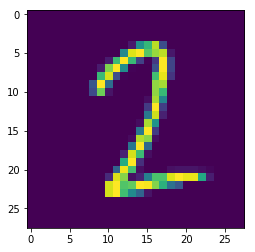

In [16]:
_=plt.imshow(mnist.test.images[456].reshape(28,28))

In [17]:
# predict using logit_2, it has not used softmax
sess.run(tf.argmax(logit_2,1), feed_dict={input_x: mnist.test.images[456].reshape(1,784), keep_prob:1.0})

array([2])

In [18]:
sess.run(logit_2, feed_dict={input_x: mnist.test.images[456].reshape(1,784), keep_prob: 1.0})

array([[-5.615129 ,  3.2794614,  5.9445357, -1.5244792, -7.455546 ,
        -4.18843  , -4.527604 ,  0.5238282, -1.7476772, -8.185882 ]],
      dtype=float32)

In [19]:
# predict using softmax, both will give the same result
sess.run(tf.argmax(y_pred,1), feed_dict={input_x: mnist.test.images[456].reshape(1,784), keep_prob:1.0})

array([2])

In [20]:
sess.run(y_pred, feed_dict={input_x: mnist.test.images[456].reshape(1,784), keep_prob: 1.0})

array([[8.8765146e-06, 6.4731248e-02, 9.3012440e-01, 5.3062657e-04,
        1.4091576e-06, 3.6970068e-05, 2.6335932e-05, 4.1148840e-03,
        4.2447817e-04, 6.7885804e-07]], dtype=float32)

Train Accuracy: 1.00
Test Accuracy:0.98


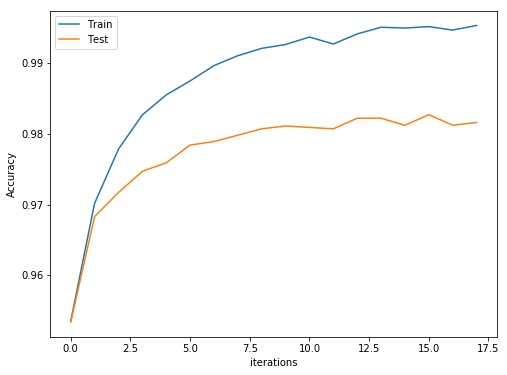

In [23]:
# Plotting chart of training and testing accuracy as a function of iterations

iterations = list(range(epochs))
plt.figure(figsize=(8,6))
plt.plot(iterations, training_accuracy, label='Train')
plt.plot(iterations, testing_accuracy, label='Test')
plt.ylabel('Accuracy')
plt.xlabel('iterations')
plt.legend()
print("Train Accuracy: {0:.2f}".format(training_accuracy[-1]))
print("Test Accuracy:{0:.2f}".format(testing_accuracy[-1]))